In [ ]:
#hide
from graphped.plot import *

# GraphPed: a novel graph-based visualization method for large and complex pedigrees

> It can deal with complex families, wrong pedigrees, and multiple groups in a family.

> It can help to check pedigrees. 

> It can show multiple traits or status in one pedigree.

> It can show pedigrees in jupyter notebook and output as common image format (pdf, svg, png).

This file will become your README and also the index of your documentation.

## Install

`pip install graphped`

## Setting the attribute yaml file

An example of yaml file.

In [ ]:
%%writefile data/default.yaml

trait1:
    fillcolor:
        1: 'white'
        2: 'dimgrey'
        -9: 'aquamarine3'

trait2:
    style:
        True: filled,setlinewidth(4)
        False: filled
    

trait3:
    fontcolor:
        True: darkorange
        False: black
    

Overwriting default.yaml


In [ ]:
attrs=load_yaml('data/default.yaml')

In [ ]:
attrs

{'trait1': {'fillcolor': {1: 'white', 2: 'dimgrey', -9: 'aquamarine3'}},
 'trait2': {'style': {True: 'filled,setlinewidth(4)', False: 'filled'}},
 'trait3': {'fontcolor': {True: 'darkorange', False: 'black'}}}

## How to use

#### 1. In command line

#### 2.In jupyter notebook

Two example pedigrees. one is standard, one is extended with 3 traits.

#### Standard ped file

In [ ]:
%%writefile data/example_fam.ped
Fam	F4	P3	F1	1	1
Fam	F3	P3	F1	2	1
Fam	F2	P3	F1	2	1
Fam	F1	P1	P2	2	2
Fam	P3	0	0	1	2
Fam	P1	0	0	1	-9
Fam	P2	0	0	2	-9

Overwriting data/example_fam.ped


In [ ]:
fam=readped('data/example_fam.ped')

In [ ]:
fam

,fid,iid,fathid,mothid,sex,trait
0,Fam,F4,P3,F1,1,1
1,Fam,F3,P3,F1,2,1
2,Fam,F2,P3,F1,2,1
3,Fam,F1,P1,P2,2,2
4,Fam,P3,0,0,1,2
5,Fam,P1,0,0,1,-9
6,Fam,P2,0,0,2,-9


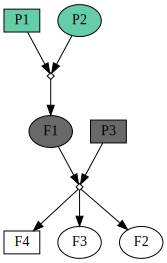

In [ ]:
plotped(fam)

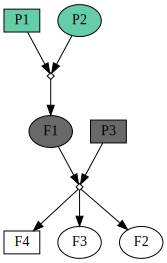

In [ ]:
plotped(fam)

#### Extended ped file

In [ ]:
%%writefile data/example_fam_ext.ped
Fam1	F4	P3	F1	1	1	True	False
Fam1	F3	P3	F1	2	1	True	True
Fam1	F2	P3	F1	2	1	True	False
Fam1	F1	P1	P2	2	2	True	False
Fam1	P3	0	0	1	2	True	False
Fam1	P1	0	0	1	-9	False	True
Fam1	P2	0	0	2	-9	False	True

Overwriting data/example_fam_ext.ped


In [ ]:
famext=readped('data/example_fam_ext.ped',attrs)

In [ ]:
famext

,fid,iid,fathid,mothid,sex,trait1,trait2,trait3
0,Fam1,F4,P3,F1,1,1,True,False
1,Fam1,F3,P3,F1,2,1,True,True
2,Fam1,F2,P3,F1,2,1,True,False
3,Fam1,F1,P1,P2,2,2,True,False
4,Fam1,P3,0,0,1,2,True,False
5,Fam1,P1,0,0,1,-9,False,True
6,Fam1,P2,0,0,2,-9,False,True


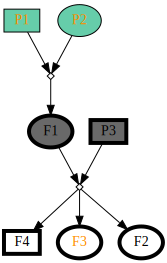

In [ ]:
plotped(famext,attrs)

In [ ]:
dots=GraphPed(fam)

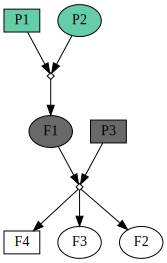

In [ ]:
show(dots)

In [ ]:
1+1

### Write out plots

In [ ]:
plotped(fam,output='data/exampleplots',format='png')

Show the plot from `data/exampleplots/Fam.png`

![data/exampleplots/Fam.png](data/exampleplots/Fam.png "Fam.png")

## Real data examples

In [ ]:
%%writefile data/self_define_attrs.yaml

ad:
    fillcolor:
        1: 'white'
        2: 'dimgrey'
        -9: 'aquamarine3'

vcf:
    style:
        True: filled,setlinewidth(4)
        False: filled
    

trim:
    fontcolor:
        True: darkorange
        False: black
    

Writing data/self_define_attrs.yaml
